In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 3417-05D0

 Directory of D:\PythonTraining\Signate\【第1回_Beginner限定コンペ】銀行の顧客ターゲティング

2020/08/01  20:04    <DIR>          .
2020/08/01  20:04    <DIR>          ..
2020/08/01  13:47    <DIR>          .ipynb_checkpoints
2020/08/01  20:04           314,653 20200801_try.ipynb
2020/08/01  17:07           151,340 submit1.csv
2020/08/01  13:45           133,290 submit_sample.csv
2020/08/01  13:46         1,571,499 test.csv
2020/08/01  13:46         2,419,460 train.csv
               5 File(s)      4,590,242 bytes
               3 Dir(s)  958,195,167,232 bytes free


In [3]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
submit = pd.read_csv('submit_sample.csv', header=None)

In [4]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,0
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,0
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown,0


In [5]:
cols = train.columns[:-1]

In [6]:
train[cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720
std,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889
min,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000
50%,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000
75%,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000
max,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000


In [7]:
train[cols].describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27100,27100,27100,27100,27100,27100,27100,27100,27100
unique,11,3,4,2,2,2,3,11,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5957,17565,15955,27090,15819,23651,19147,11232,23099


In [8]:
cols_i = train[cols].select_dtypes(exclude='object').columns
cols_i

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [9]:
train[cols_i].isnull().any()

age         False
balance     False
day         False
duration    False
campaign    False
pdays       False
previous    False
dtype: bool

In [10]:
train.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [11]:
cols_o = train.select_dtypes(include='object').columns
cols_o

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

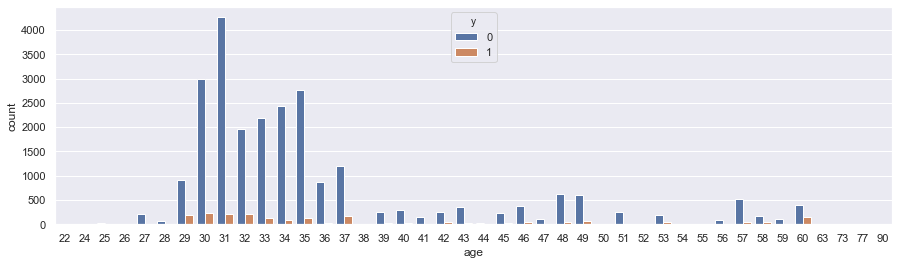

In [12]:
plt.figure(figsize=(15, 4))
sns.countplot(x=cols[0], data=train, hue='y')

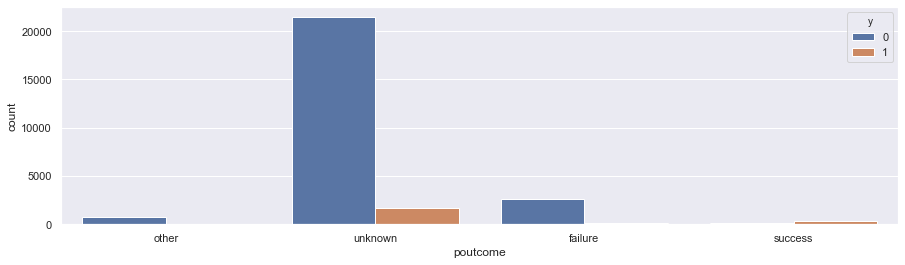

In [13]:
plt.figure(figsize=(15, 4))
sns.countplot(x=cols[15], data=train, hue='y')

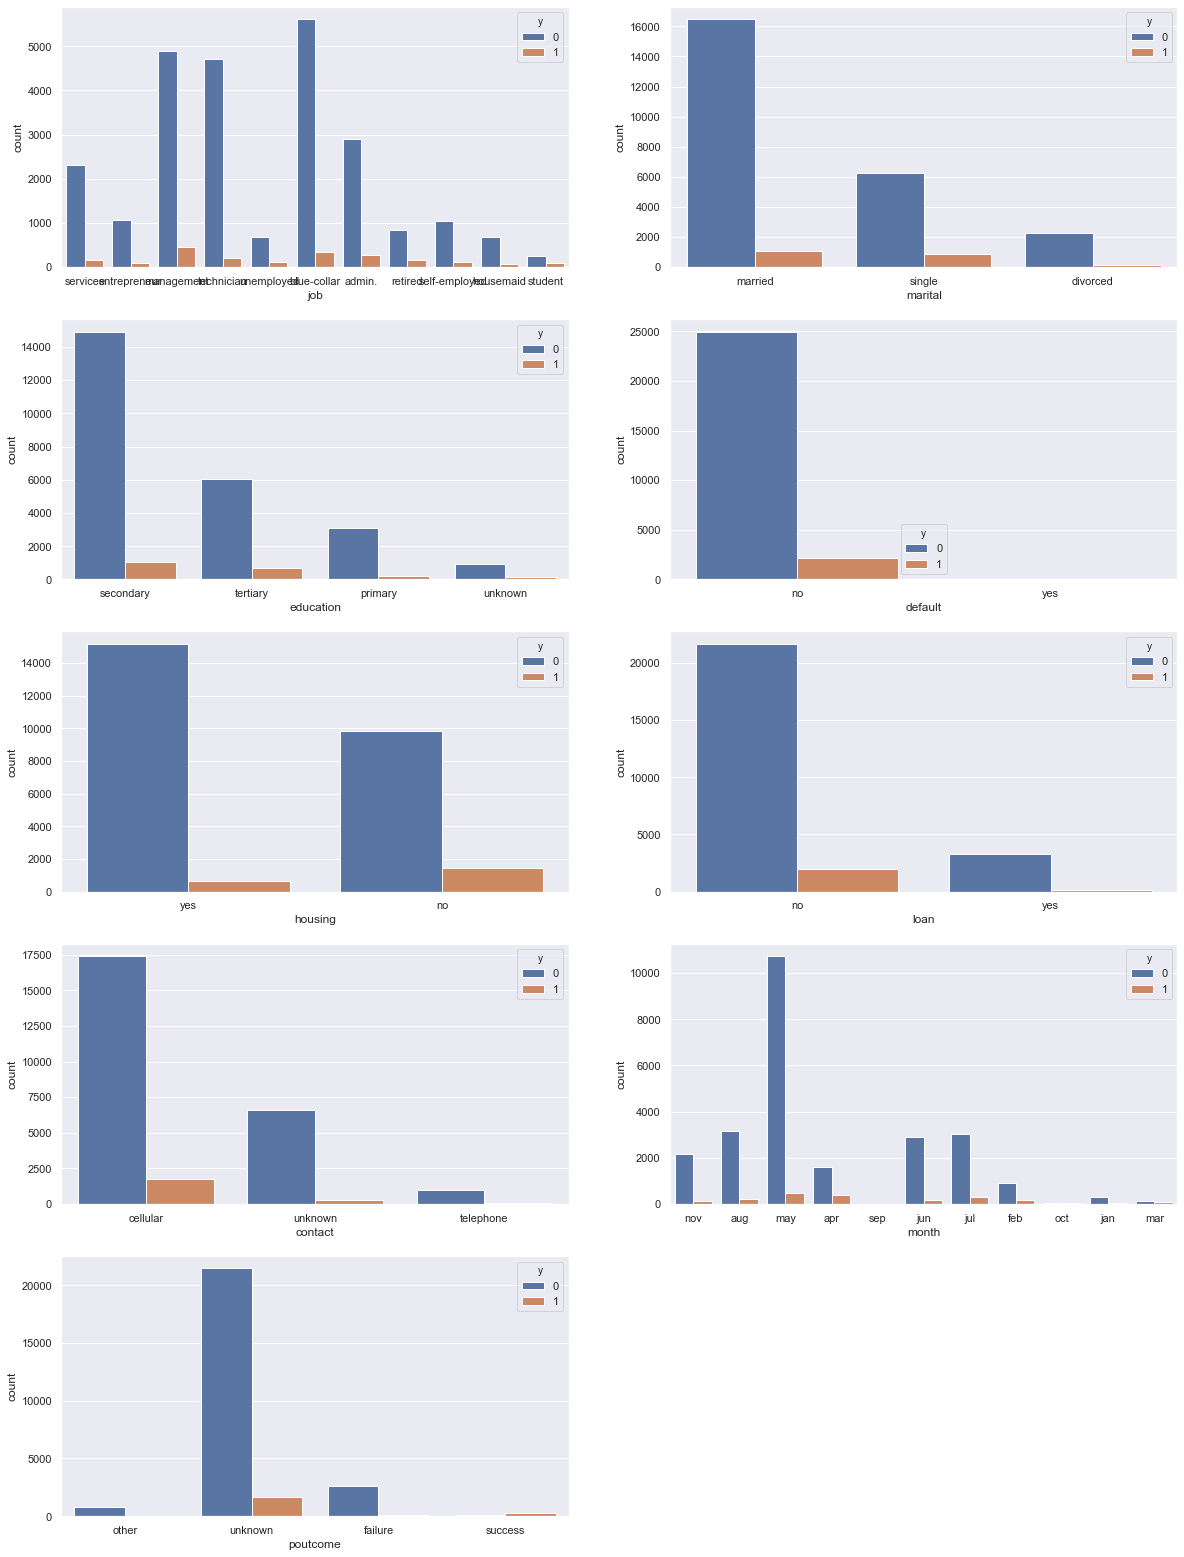

In [14]:
#グラフを作る
fig = plt.figure(figsize=(20,len(cols_o)*5))
width = 2

for i, col in enumerate(cols_o):
    ax = fig.add_subplot(len(cols)//width,width,i+1)
    sns.countplot(x=col, data=train, hue='y')
    

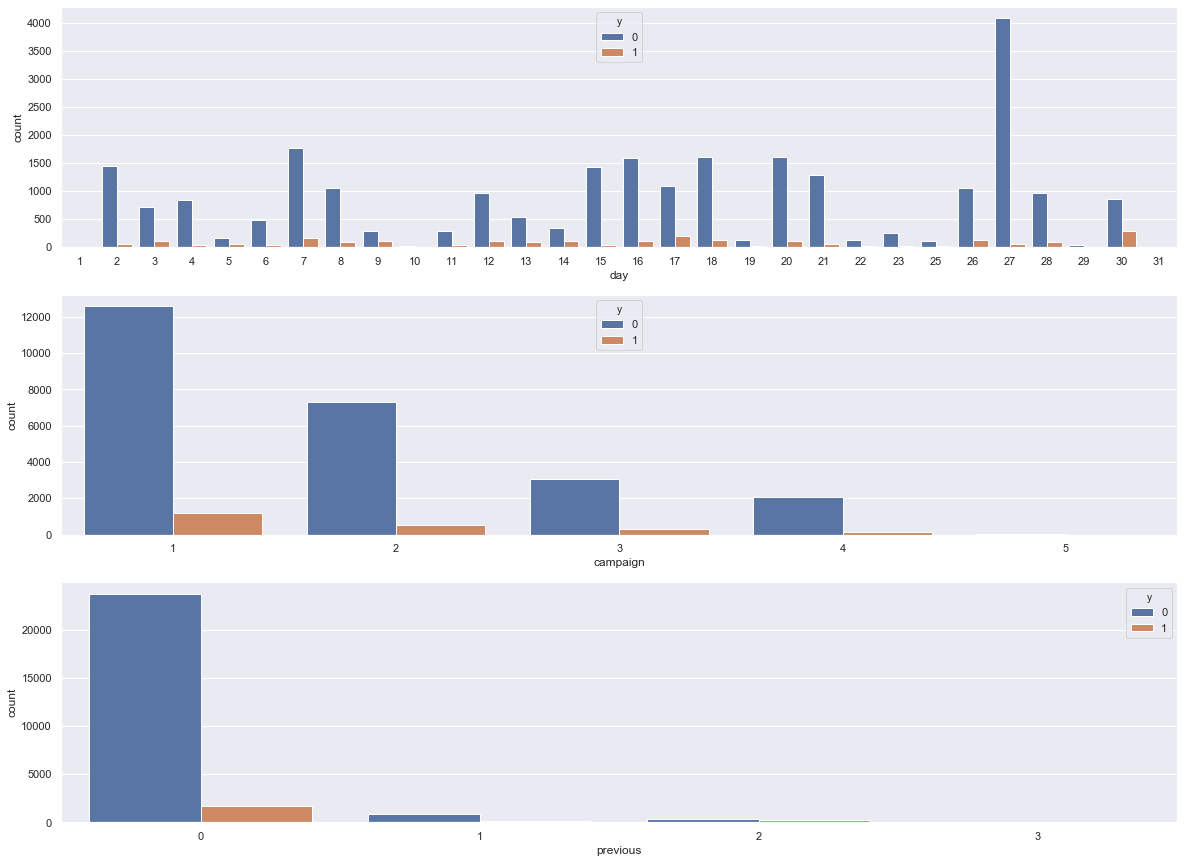

In [15]:
#グラフを作る
sel_cols = ['day', 'campaign', 'previous']
fig = plt.figure(figsize=(20,len(sel_cols)*5))
width = 1

for i, col in enumerate(sel_cols):
    ax = fig.add_subplot(len(sel_cols)//width,width,i+1)
    sns.countplot(x=col, data=train, hue='y')
    

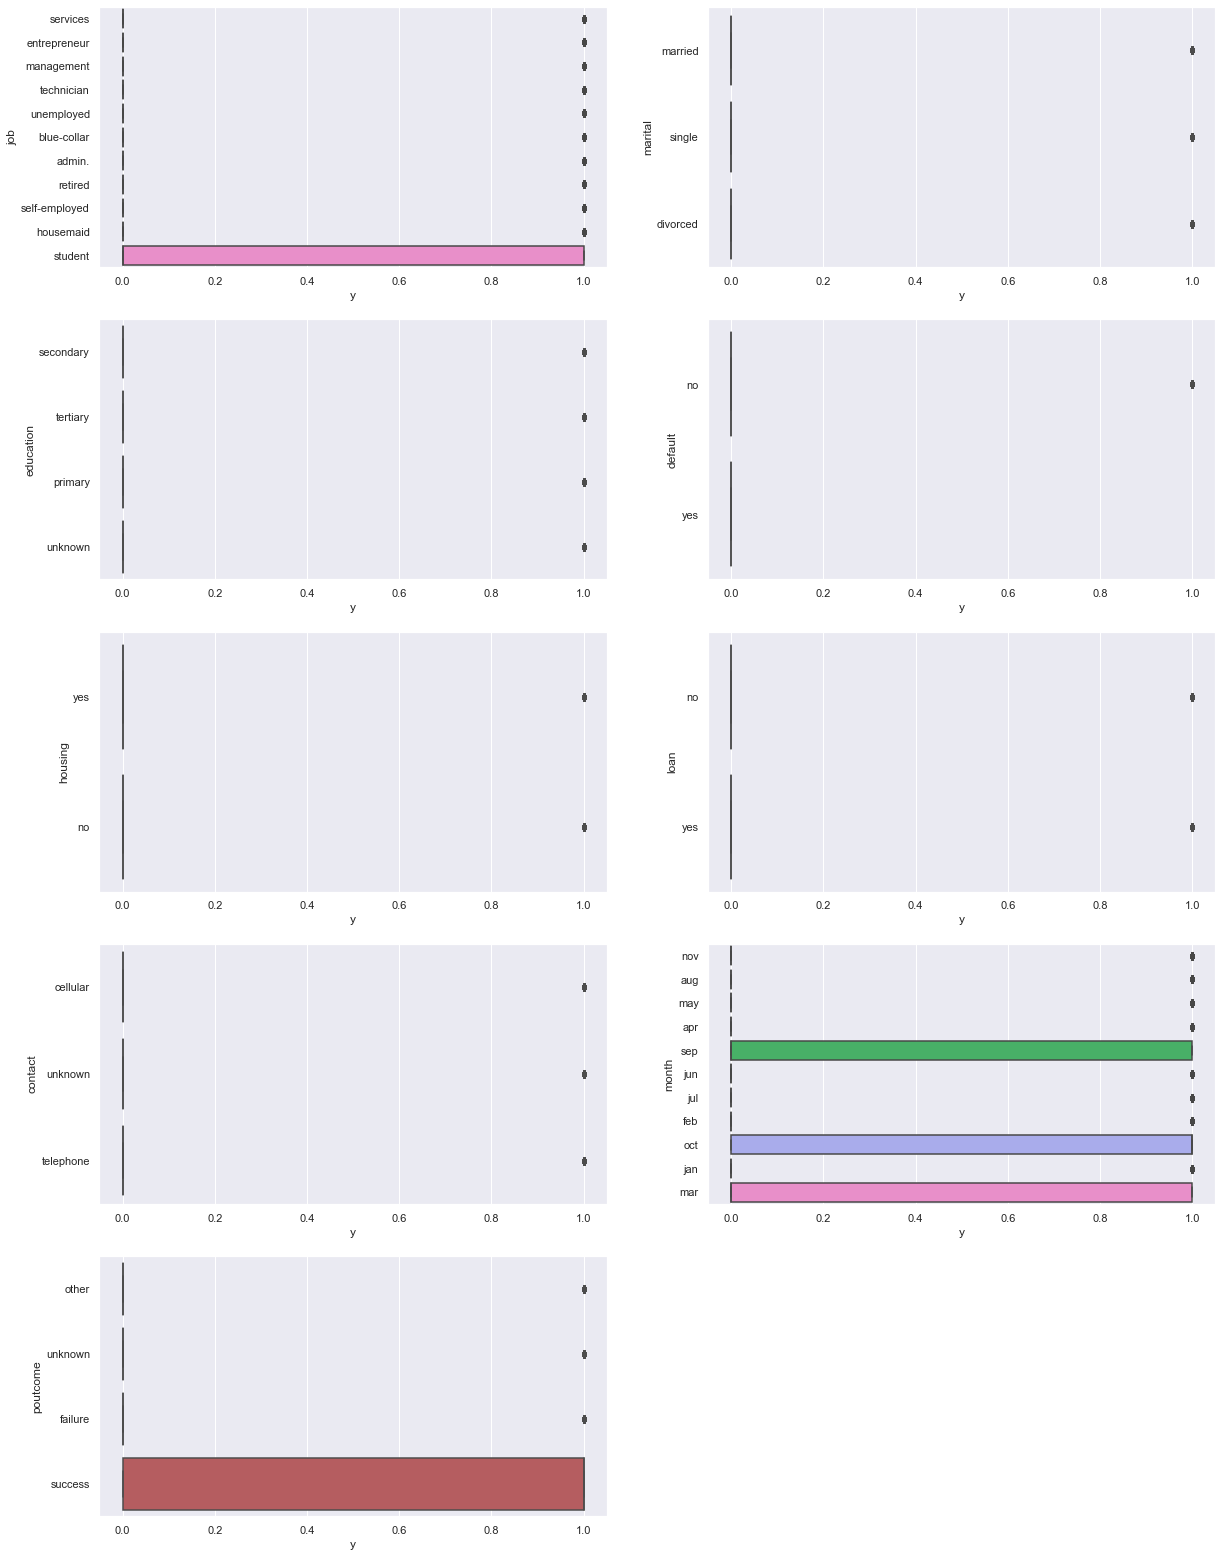

In [16]:
#グラフを作る
fig = plt.figure(figsize=(20,len(cols_o)*5))
width = 2

for i, col in enumerate(cols_o):
    ax = fig.add_subplot(len(cols)//width,width,i+1)
    sns.boxplot(x='y', y=col, data=train)
    

# Machine Learningを開始

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

enc = OneHotEncoder(sparse=False)

In [18]:
X = train[cols_i]
X

,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,
0,31,12294,21,101,3,498,0
1,29,43027,22,158,2,702,0
2,35,12252,11,351,1,826,0
3,31,99121,16,658,2,120,0
4,48,42005,3,177,1,273,0
...,...,...,...,...,...,...,...
27095,37,26661,27,345,4,425,0
27096,35,42150,27,121,1,719,0
27097,35,34531,28,177,2,121,0


In [19]:
X = train[train.columns[:-1]]
# X = pd.get_dummies(X, drop_first=True)
X = enc.fit_transform(X) 
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
y = train[train.columns[-1]]
y

id
0        0
1        1
2        0
3        0
4        0
        ..
27095    0
27096    0
27097    0
27098    0
27099    0
Name: y, Length: 27100, dtype: int64

In [21]:
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
id
9884     0
16500    0
13843    0
743      0
9362     0
        ..
13123    0
19648    0
9845     0
10799    0
2732     0
Name: y, Length: 21680, dtype: int64


In [22]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2, 5)),
          'eta': [0.01, 0.1, 1.0],
          'gamma': [0, 0.1],
          'nthread': [2, 4],
          'n_estimators': list(range(50, 200, 50)),
         }


## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_estimator = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1)

reg_cv = GridSearchCV(estimator=xgb_estimator, param_grid=params, cv=5, return_train_score=True, scoring='roc_auc')
reg_cv.fit(X_train, y_train)

In [ ]:
print('best score: {:0.3f}'.format(reg_cv.score(X_train, y_train)))
print('best params: {}'.format(reg_cv.best_params_))
print('best val score:  {:0.3f}'.format(reg_cv.best_score_))


In [ ]:
xgb = reg_cv.best_estimator_
score = xgb.score(X_test, y_test)
print('score: {}' .format(score))

auc = roc_auc_score(y_test, xgb.predict(X_test))
print('auc: {}' .format(auc))


## LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type='gbdt',  objective='binary', learning_rate=0.01, metric='auc')

reg_cv = GridSearchCV(estimator=lgb, param_grid=params, cv=5, return_train_score=True, scoring='roc_auc')
# reg_cv = GridSearchCV(lgb, params, cv=5, return_train_score=True, verbose=3)
reg_cv.fit(X_train, y_train)


In [ ]:
print('best score: {:0.3f}'.format(reg_cv.score(X_train, y_train)))
print('best params: {}'.format(reg_cv.best_params_))
print('best val score:  {:0.3f}'.format(reg_cv.best_score_))


In [ ]:
lgb = reg_cv.best_estimator_
score = lgb.score(X_test, y_test)
print('score: {}' .format(score))

auc = roc_auc_score(y_test, lgb.predict(X_test))
print('auc: {}' .format(auc))


In [ ]:
predict = lgb.predict(test[cols_i])
predict

In [ ]:
submit

In [ ]:
submit[1] = predict

In [ ]:
submit.to_csv('submit1.csv', index=None, header=None)

# Nural Network

## PyTroch

In [ ]:
X_train.values

In [ ]:
y_train

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

train_X = torch.tensor(X_train.values, dtype=torch.float32)
train_y = torch.tensor(y_train.values)
test_X = torch.tensor(X_test.values, dtype=torch.float32)
test_y = torch.tensor(y_test.values)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

batch_size = 64
n_epochs = 100

In [ ]:
train = TensorDataset(train_X, train_y)
print(train[0])

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)


In [ ]:
class Net(nn.Module):
    def __init__(self, col_num):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(col_num, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 2)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) # ReLU: max(x, 0)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
net = Net(X_train.shape[1])
# net.to(device)


In [ ]:
# 損失関数
# criterion = nn.CrossEntropyLoss() # 他クラス分類:ソフトマックス交差エントロピー誤差
#criterion = nn.MSELoss() # 回帰:平均二乗誤差
#criterion = nn.L1Loss() # 回帰:平均絶対値誤差
criterion = nn.BCELoss() # 二値分類:バイナリ交差エントロピー
# criterion = nn.BCEWithLogitsLoss() # 二値分類:ロジット・バイナリ交差エントロピー

# 最適化関数
# optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [ ]:
for epoch in range(n_epochs):
    total_loss = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
#         inputs, labels = data[0].to(device), data[1].to(device)

        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if (epoch+i)%60 == 0:
        print(epoch+1, total_loss)


In [ ]:
_, predicted = torch.max(outputs, 1)

# print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
#                               for j in range(4)))

In [ ]:
predicted

## Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax'),
])


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size)


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


In [ ]:
test

In [ ]:
X = test[test.columns[:-1]]
# X = pd.get_dummies(X, drop_first=True)
X = enc.transform(X) 
X

In [ ]:
X

In [ ]:
test_X = torch.tensor(X.values, dtype=torch.float32)

model.predict(test_X)